In [1]:
import uproot
import boost_histogram as bh
import matplotlib.pyplot as plt
import matplotlib as mpl
import mplhep as hep
import awkward1 as ak
import pandas as pd
import numpy as np
import seaborn as sns

def set_sns_color(*args):
    sns.palplot(sns.color_palette(*args))
    sns.set_palette(*args)

#===========================================load config file====================================================================
import sys,os
sys.path.append("/cms/user/guojl/ME_test/CMSSW_10_6_26/src/HZZAnalysis/lib")
from utils import *

import yaml
sf_particleNet_signal = {}
with open('/cms/user/guojl/ME_test/CMSSW_10_6_26/src/HZZAnalysis/cards/NetSF_signal_2016Legacy.yml') as f:
    sf_particleNet_signal = yaml.safe_load(f)
config = {}
with open("/cms/user/guojl/ME_test/CMSSW_10_6_26/src/HZZAnalysis/cards/config_UL16.yml") as f:
    config = yaml.safe_load(f)
#======================================================================================================================================================
#year = '2016'

In [29]:
with open("/cms/user/guojl/ME_test/CMSSW_10_6_26/src/HZZAnalysis/cards/config_UL16_old.yml") as f:
    config = yaml.safe_load(f)

In [30]:
year = '2018'

In [31]:
use_helvet = True  ## true: use helvetica for plots, make sure the system have the font installed
if use_helvet:
    CMShelvet = hep.style.CMS
    CMShelvet['font.sans-serif'] = ['Helvetica', 'Arial']
    plt.style.use(CMShelvet)
else:
    plt.style.use(hep.style.CMS)

In [32]:
def reshape(histo,mean,width):
    h = bh.Histogram(bh.axis.Regular(nbins, xmin, xmax))
    h.fill(np.random.normal(loc=mean, scale=width, size=int(histo.view().value.sum())))
    reshape_weight = h.view()/histo.view().value
    np.nan_to_num(reshape_weight,0)
    return reshape_weight

This is ggh


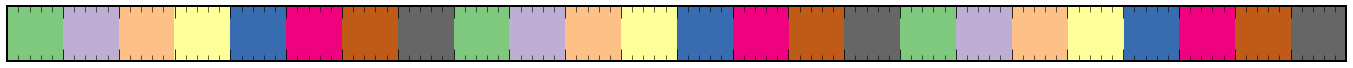

In [33]:
branchs = ['GEN_H1_mass','EventWeight','foundZ1LCandidate','foundTTCRCandidate','foundZ2JCandidate','foundZ2MergedCandidata','foundTTCRCandidate','passedfullmerged','passedfullresolved','particleNetZvsQCD','passedNassociated',
                        'massmerged','ptmerged','mass2jet',
                        'mass2l2jet', 'mass2lj',]
#samples = ['ggh125','ggh300','ggh350','ggh400','ggh450','ggh500','ggh550','ggh600','ggh700','ggh800','ggh900','ggh1000','ggh1500','ggh2500','ggh3000']
samples = ['ggh']; sam = 'ggh'
#samples = ['vbf'] ; sam = 'vbf'
#samples = ['sig'] ; sam = 'sig'

#massList = [125,300,350,400,450,500,550,600,700,800,900,1000,1500,2500,3000]
massList = []
for mass in range(500,1000,50):
    massList.append(mass)
for mass in range(1000,1600,100):
    massList.append(mass)
for mass in range(1600,3200,200):
    massList.append(mass)
# Set plot color
color_order = sns.color_palette('Accent', len(massList))
set_sns_color(color_order)
####
#sig_arr, sumWeight = extractSpecialBranch(config,year,samples,branchs)
branchs = config['var_read_lists'].append('GEN_H1_mass')
sig_arr, sumWeight = extractSpecialBranch(config,year,samples,branchs)

# GEN Raw mass Higgs

In [38]:
####Get Gen leval histograms
sig_hist_dir = {}
sig_hist = []
sig_gen_hist_raw = {}
nbins, xmin, xmax = 400,0,4000
edge = np.linspace(xmin, xmax, nbins+1)
with uproot.recreate(f"Histos_gen{sam}_{year}.root") as f:
    for i,sample in enumerate(samples):
        print(sample)
        #temp_arr = sig_arr[sample]
        weights = np.ones_like(sig_arr[sample]['GEN_H1_mass'])
        sig_hist.append(get_hist(sig_arr[sample]['GEN_H1_mass'],weights,nbins,xmin,xmax))
        sig_hist_dir[sample] = get_hist(sig_arr[sample]['GEN_H1_mass'],weights,nbins,xmin,xmax)

        #reshape
        #re_weight = reshape(sig_hist_dir[sample],massList[i],width)
        #sig_hist_dir[sample].view().value = (sig_hist_dir[sample].view().value)*re_weight
        
        f[sample] = sig_hist_dir[sample]
for i,mass in enumerate(massList):
    sig_gen_hist_raw[mass] = sig_hist_dir[sam]
    print(f'{sig_gen_hist_raw[mass].view().value.sum()}')


ggh
1928913.0
1928913.0
1928913.0
1928913.0
1928913.0
1928913.0
1928913.0
1928913.0
1928913.0
1928913.0
1928913.0
1928913.0
1928913.0
1928913.0
1928913.0
1928913.0
1928913.0
1928913.0
1928913.0
1928913.0
1928913.0
1928913.0
1928913.0
1928913.0


In [9]:
year

'2018'

[INFO] DONE


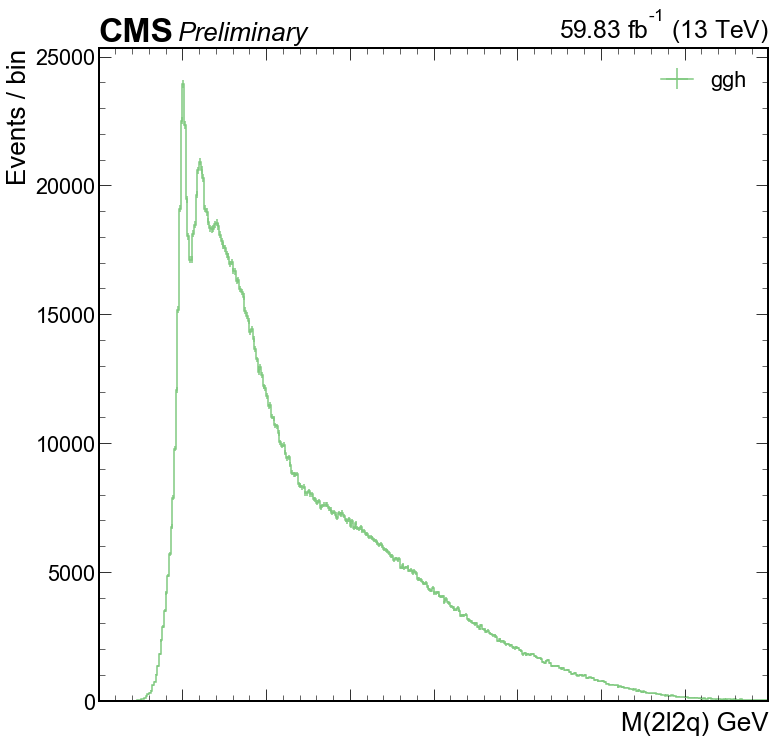

In [39]:
###plot Gen Higgs mass
f = plt.figure(figsize=(12,12))
ax = f.add_subplot()
hep.cms.label(data=True, llabel='Preliminary',year=year,rlabel=r'%s $fb^{-1}$ (13 TeV)'%config['lumi'][year], fontname='sans-serif')
ax.set_xlim(xmin, xmax); ax.set_xticklabels([]); ax.set_ylabel('Events / bin', ha='right', y=1.0)
ax.set_xlabel(r'M(2l2q) GeV', ha='right', x=1.0)
plot_hist(sig_hist,label=[ var for var in samples])
plt.legend()
plt.savefig(f'GenH_{sam}_{year}.png')
print('[INFO] DONE')


# Raw Reco Plots

This is merged
[INFO] DONE
This is resolved
[INFO] DONE
This is all
[INFO] DONE


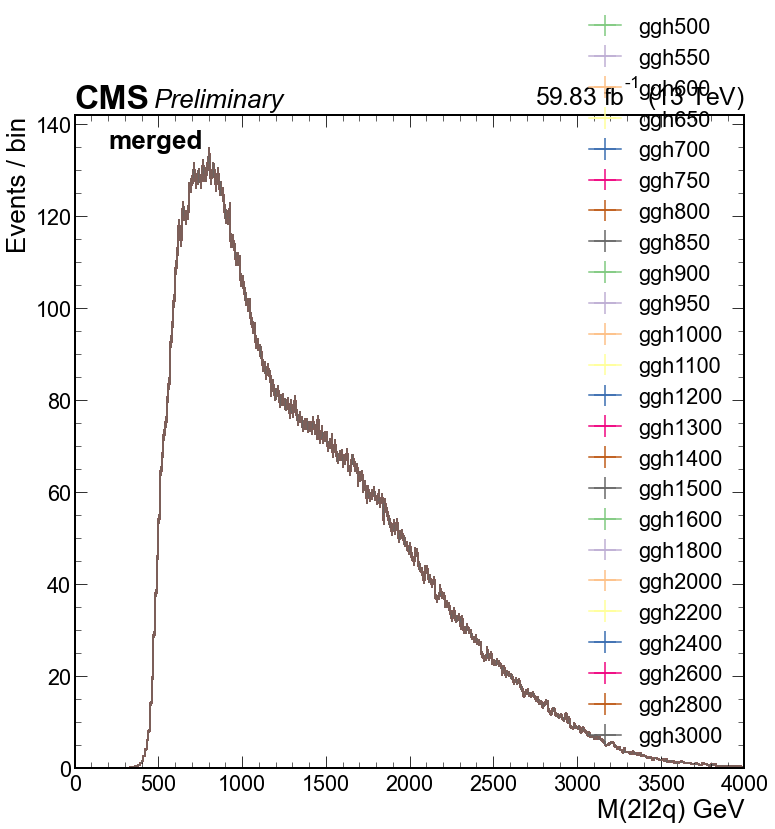

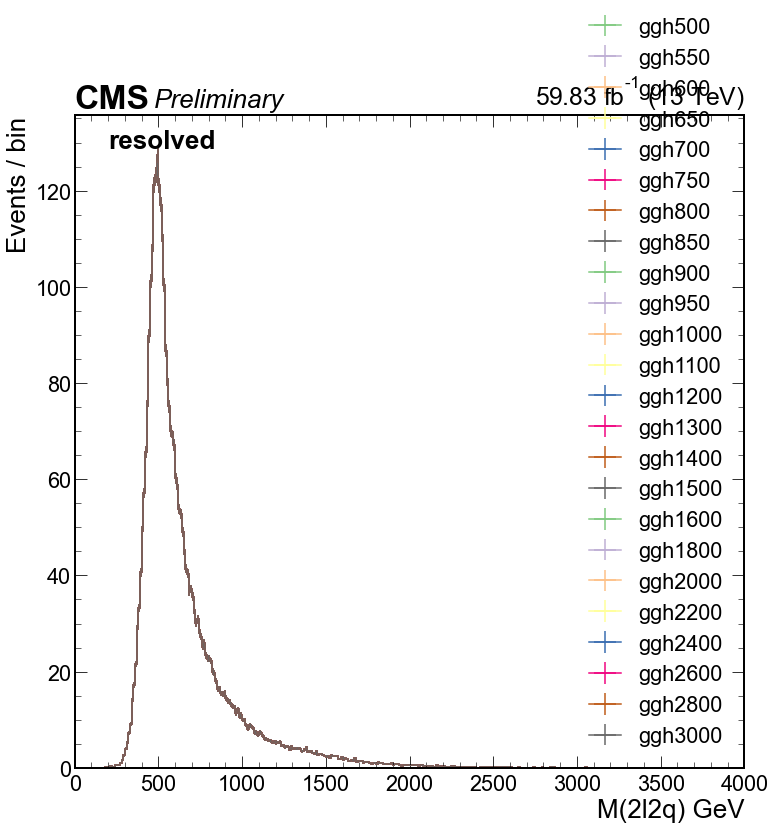

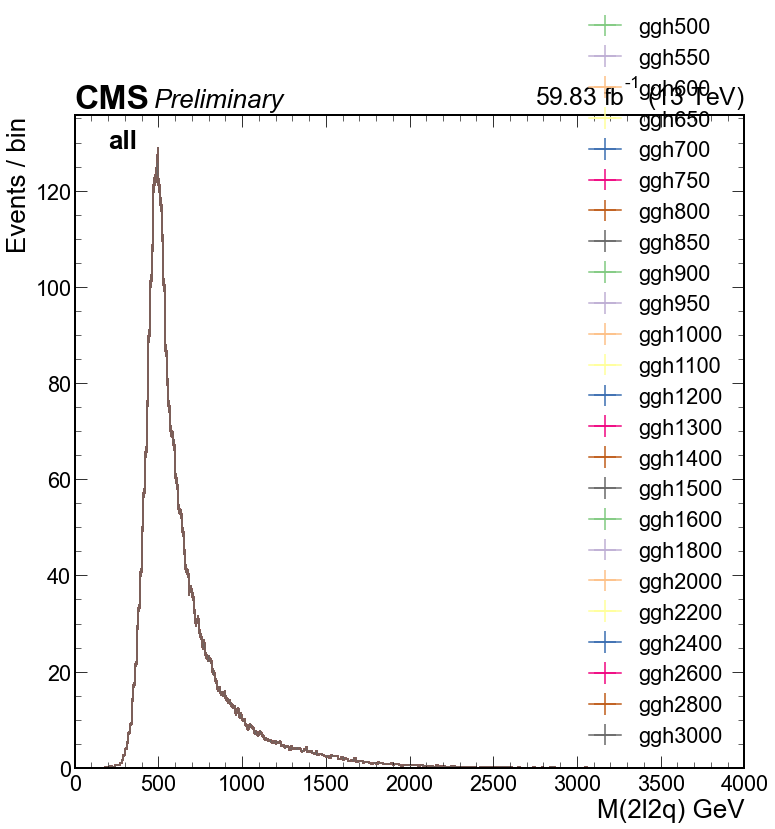

In [41]:
sig_arr_cut = {}
sig_hist_cut = {}
eff = {}
selections = {'merged':'((massmerged>70) & (massmerged<105)) & (particleNetZvsQCD>0.9) & (foundZ1LCandidate==True) & (foundZ2MergedCandidata==True)',
            'resolved':'((mass2jet>70) & (mass2jet<105)) & (foundZ1LCandidate==True) & (foundZ2JCandidate==True)',
            'all': '(((massmerged>70) & (massmerged<105)) & (particleNetZvsQCD>0.9) & (foundZ1LCandidate==True) & (foundZ2MergedCandidata==True)) | (((mass2jet>70) & (mass2jet<105)) & (foundZ1LCandidate==True) & (foundZ2JCandidate==True))'}
for case in selections.keys():
    print(f'This is {case}')
    if(case=='resolved'):
        massZZ = 'mass2l2jet'
    elif(case=='merged'):
        massZZ = 'mass2lj'

    sig_arr_cut[case] = {}; sig_hist_cut[case] = []; eff[case] = {}
    for i,mass in enumerate(massList):
        sample = f'{sam}{mass}'
        cut_array = ak.numexpr.evaluate(selections[case],sig_arr[sam])
        sig_arr_cut[case][sample] = sig_arr[sam][cut_array]
        weights = (sig_arr_cut[case][sample]['EventWeight']*config['lumi'][year]*config['samples_inf'][sam][1]*1000)/sumWeight[sam]
        temp_hist = get_hist(sig_arr_cut[case][sample][massZZ],weights,nbins,xmin,xmax)
        sig_hist_cut[case].append(temp_hist)
        ######calculate eff
        temp_hist_unweight = get_hist(sig_arr_cut[case][sample][massZZ],ak.ones_like(sig_arr_cut[case][sample]['EventWeight']),nbins,xmin,xmax)
        #compute eff with reshape weight applying
        #if(massList[i]>200):
        #    width = massList[i]*0.03
        #    re_weight = reshape(sig_hist_dir[sample],massList[i],width)
        #    temp_hist_unweight.view().value = (temp_hist_unweight.view().value)*re_weight
        #eff[case][sample] = temp_hist_unweight.view().value.sum()/sig_hist_dir[sample].view().value.sum()
        #print(f'eff = {eff[case][sample]} in {sample} with {case}')

    ######plot reco-plot
    f = plt.figure(figsize=(12,12))
    ax = f.add_subplot()
    hep.cms.label(data=True, llabel='Preliminary',year=year,rlabel=r'%s $fb^{-1}$ (13 TeV)'%config['lumi'][year], fontname='sans-serif')
    ax.set_xlim(xmin, xmax); ax.set_ylabel('Events / bin', ha='right', y=1.0)
    ax.set_xlabel(r'M(2l2q) GeV', ha='right', x=1.0)
    plot_hist(sig_hist_cut[case],label=[ f'{sam}{var}' for var in massList])
    ax.text(0.05, 0.95, f'{case}', transform=ax.transAxes, fontweight='bold') 
    plt.legend()
    plt.savefig(f'./plots/{year}/recoRaw_m2l2q_{sam}_{case}.png')
    print('[INFO] DONE')

    ####eff plot
    #f, ax = plt.subplots(figsize=(12, 12))
    #eff_all=[]
    #for sample in samples:
    #    eff_all.append(eff[case][sample])
    #ax.plot(massList,eff_all)


In [12]:
###signal Eff plots
plt.close()

# Re-shape reco-plots

/tmp/ipykernel_31032/1924718592.py:4: RuntimeWarning: invalid value encountered in true_divide
  reshape_weight = h.view()/histo.view().value


reshape weight = [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.75530981e-04 9.91124260e-03
 1.01421681e-01 6.56301146e-01 3.02936054e+00 8.70884658e+00
 1.63031937e+01 2.12057557e+01 1.99201770e+01 1.39315853e+01
 6.76800575e+00 2.01620332e+00 3.82863151e-01 4.77803738e-02
 2.92381530e-03 2.16461930e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.0000

/tmp/ipykernel_31032/1924718592.py:4: RuntimeWarning: invalid value encountered in true_divide
  reshape_weight = h.view()/histo.view().value


reshape weight = [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.11982083e-03
 1.18324607e-02 9.19749523e-02 5.09790005e-01 2.31540561e+00
 7.75531696e+00 1.70688641e+01 2.57200514e+01 2.56552570e+01
 1.69565289e+01 8.14513772e+00 2.63682174e+00 6.05518850e-01
 9.95697897e-02 1.16538798e-02 1.52837351e-03 5.23477988e-05
 0.0000

/tmp/ipykernel_31032/1924718592.py:4: RuntimeWarning: invalid value encountered in true_divide
  reshape_weight = h.view()/histo.view().value


reshape weight = [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.02702582e-04
 4.21247303e-03 3.88990622e-02 2.64295310e-01 1.16343458e+00
 3.66105809e+00 8.92678175e+00 1.53354372e+01 1.97669549e+01
 1.94141969e+01 1.46189181e+01 8.12113593e+00 3.49939800e+00
 1.0599

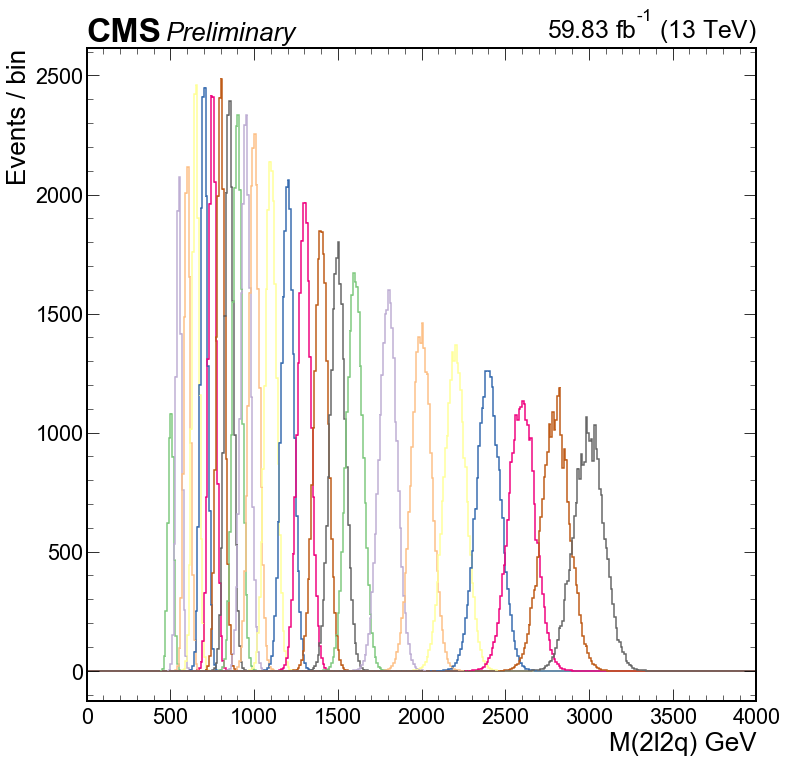

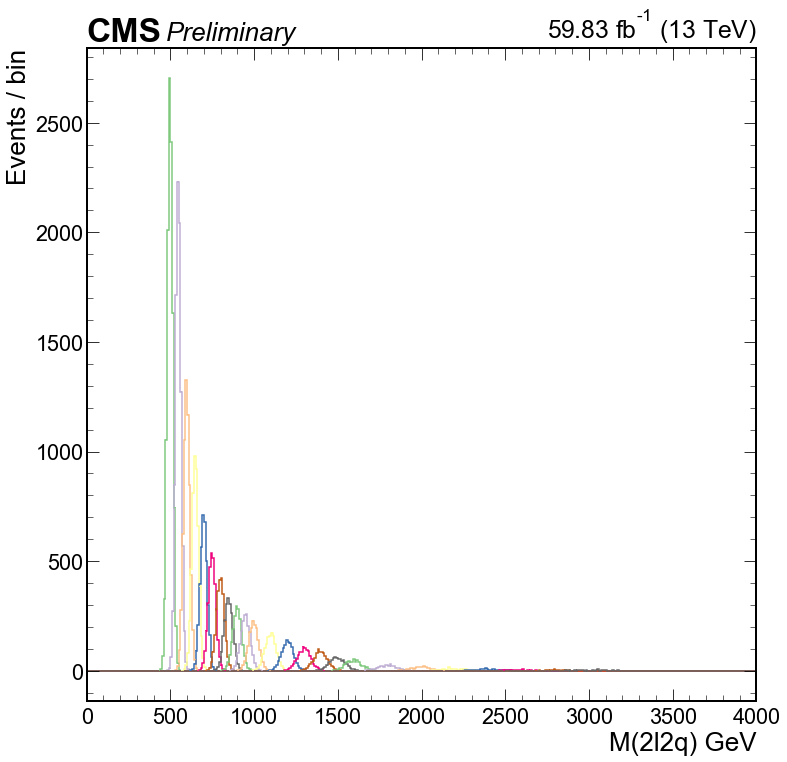

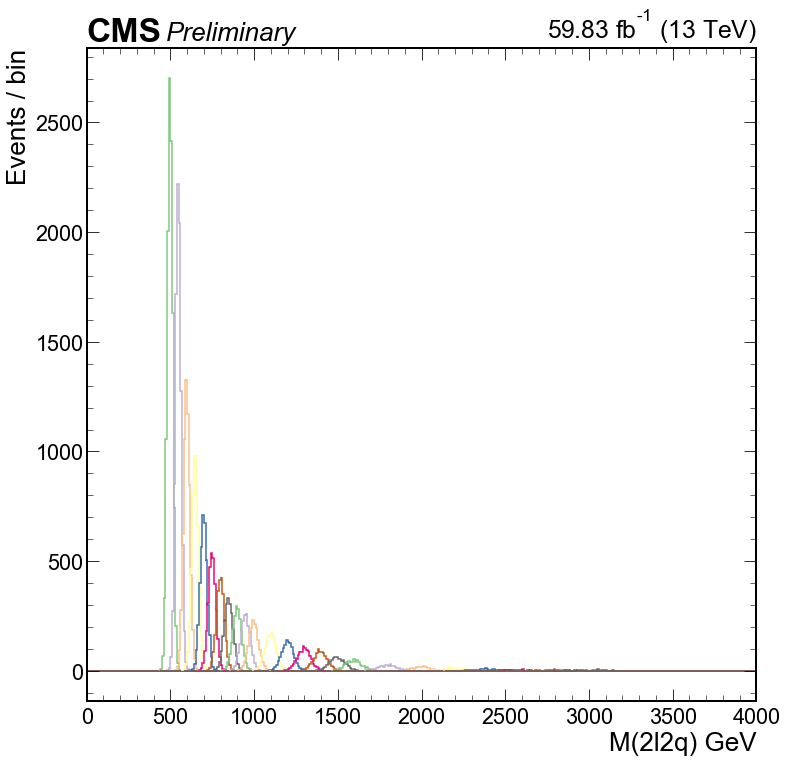

In [42]:
nSample = len(samples)
#sample = 'ggh'
sig_hist_reshape = {}
#width = 100
for case in selections.keys():
    sig_hist_reshape[case]=[]
    for i,mass in enumerate(massList):
        sig_hist_reshape[case].append(sig_hist_cut[case][i]) #sig_hist_cut = Reco_sig_with_selections
        #if(massList[i]>700): #reshape if mass lager than 700
        #    re_weight = reshape(sig_hist[i],massList[i],width) #sig_hist = GEN_sig_hist_withoutCut
        #    sig_hist_reshape[case][i].view().value = (sig_hist_reshape[case][i].view().value)*re_weight
        if(massList[i]>0): #reshape if mass lager than 700
            width = massList[i]*0.03
            #re_weight = reshape(sig_hist[0],massList[i],width) #sig_hist = GEN_sig_hist_withoutCut
            print(f'reshape weight = {re_weight}')
            sig_hist_reshape[case][i].view().value = (sig_hist_reshape[case][i].view().value)*re_weight


    ######plot reshaped reco-plot
    f = plt.figure(figsize=(12,12))
    ax = f.add_subplot()
    hep.cms.label(data=True, llabel='Preliminary',year=year,rlabel=r'%s $fb^{-1}$ (13 TeV)'%config['lumi'][year], fontname='sans-serif')
    ax.set_xlim(xmin, xmax); ax.set_ylabel('Events / bin', ha='right', y=1.0)
    ax.set_xlabel(r'M(2l2q) GeV', ha='right', x=1.0)
    plot_hist(sig_hist_reshape[case],label=[ f'{sam}{var}' for var in massList])
    #ax.set_ylim(0, 3000)
    #plt.legend()
    plt.savefig(f'./plots/{year}/recoReshaped_m2l2q_{sam}_{case}.png')
    print('[INFO] DONE')

In [43]:
plt.close()

In [44]:
with uproot.recreate(f'Histos_{sam}_{year}.root') as f:
    for case in selections.keys():
        for i,mass in enumerate(massList):
            sample = f'{sam}{mass}'
            f[f'{sample}_{case}'] = sig_hist_reshape[case][i]
    

# Get Eff for different catgory

In [45]:
#regions = ['CR','SR']
#samples = ['ggh500','ggh600','ggh700','ggh800','ggh900','ggh1000','ggh1500','ggh2500','ggh3000']
region = "SR"
tags = ['btag','untag','vbftag']
#channels = ['isEE','isMuMu','2lep']
channels = ['isEE','isMuMu']
cases = ['merged','resolved']
if(sam=='ggh'):
    pro_str = 'spin0_ggH'
elif(sam=='vbf'):
    pro_str = 'spin0_VBF'
chanName = {'isEE':'eeqq','isMuMu':'mumuqq','2lep':'llqq'}
caseName = {'merged':"Merged",'resolved':"Resolved"}
tagName = {'btag':'b-tagged','untag':'untagged','vbftag':'vbf-tagged'}


In [46]:
from array import array

In [47]:
sig_arr_cut = {}
sig_hist_cut = {}
eff = {}
eff_GraphY = {}; eff_GraphYerr = array('f',[])
eff_graph = {}
#restored_sig_hist = sig_hist_dir[sam]
#samples = ['ggh500']; channels = ['2lep']
for channel in channels:
    sig_arr_cut[channel] = {}; sig_hist_cut[channel]={}; eff[channel] = {}; eff_GraphY[channel] = {}; eff_graph[channel] = {}
    for case in cases:
        if case=='merged':
            massZZ = 'mass2lj'
        elif case=='resolved':
            massZZ = 'mass2l2jet'
        sig_arr_cut[channel][case] = {}; sig_hist_cut[channel][case] = {}; eff[channel][case] = {}; eff_GraphY[channel][case] = {}; eff_graph[channel][case]={}
        for tag in tags:
            sig_arr_cut[channel][case][tag] = {}; sig_hist_cut[channel][case][tag] = []; eff[channel][case][tag] = {}; eff_GraphY[channel][case][tag] = array('f',[]); eff_graph[channel][case][tag]=None
            selection = config['cut'][region][channel][case][tag]
            print(f"[INFO] cut selection = {selection}")
            for i,mass in enumerate(massList):
                #sig_hist_dir[sam] = restored_sig_hist
                sample = f'{sam}{mass}'
                #print(f'[INFO] This is {channel} {case} {tag} in {sample}')
                #selection = config['cut'][region][channel][case][tag]
                cut_array = ak.numexpr.evaluate(selection,sig_arr[sam])
                sig_arr_cut[channel][case][tag][sample] = sig_arr[sam][cut_array]
                weights = (sig_arr_cut[channel][case][tag][sample]['EventWeight']*config['lumi'][year]*config['samples_inf']['ggh'][1]*1000)/sumWeight[sam]
                temp_hist = get_hist(sig_arr_cut[channel][case][tag][sample][massZZ],weights,nbins,xmin,xmax)
                sig_hist_cut[channel][case][tag].append(temp_hist)
                ######calculate eff
                temp_hist_unweight = get_hist(sig_arr_cut[channel][case][tag][sample][massZZ],ak.ones_like(sig_arr_cut[channel][case][tag][sample]['EventWeight']),nbins,xmin,xmax)
                #print(f'[INFO] sum of events after applying selections in {channel} {case} {tag} {sample} = {temp_hist_unweight.view().value.sum()}')
                #print(f'[INFO] sum of events after applying selections and weight in {channel} {case} {tag} {sample} = {temp_hist.view().value.sum()}')
                #print(f'[INFO] sum of events in GEN level in {sample} = {sig_hist_dir[sample].view().value.sum()}')
                #print(f'[INFO] ')
                if(massList[i]>0): #reshape if mass lager than 700
                    width = massList[i]*0.03
                    re_weight = reshape(sig_hist[0],mass,width) #sig_hist = GEN_sig_hist_withoutCut
                    #print(f'reshape weight = {re_weight}')
                    temp_hist_unweight.view().value = (temp_hist_unweight.view().value)*re_weight #reconstruction level cutted reshaped histo
                    #reshape gen hist
                    #temp_gen_hist_unweight = sig_gen_hist_raw[mass]
                    #temp_gen_hist_unweight.view().value = (temp_gen_hist_unweight.view().value)*re_weight
                reco_number = temp_hist_unweight.view().value.sum()
                gen_number = sig_hist_dir[sam].view().value.sum()
                #gen_number = temp_gen_hist_unweight.view().value.sum()
                #print(f"sig number of events before = {gen_number}")
                #print(f"sig number of events before cut = {gen_number}")
                #eff[channel][case][tag][sample] = (temp_hist_unweight.view().value.sum())/(sig_hist_dir[sam].view().value.sum())
                eff[channel][case][tag][sample] = reco_number/gen_number
                if(eff[channel][case][tag][sample]==np.inf):
                    eff[channel][case][tag][sample]=0.0
                eff_GraphY[channel][case][tag].append(eff[channel][case][tag][sample]); eff_GraphYerr.append(0.0)
                print(f'eff = {eff[channel][case][tag][sample]} in {channel} {case} {tag} in {sample}')

[INFO] cut selection = ((massmerged>70) & (massmerged<105)) & (particleNetZvsQCD>0.9) & (particleNetZbbvslight>0.9) & (KD_JVBF<0.5) & (foundZ1LCandidate==True) & (foundZ2MergedCandidata==True) & (isEE==True)


/tmp/ipykernel_31032/1924718592.py:4: RuntimeWarning: invalid value encountered in true_divide
  reshape_weight = h.view()/histo.view().value


eff = 0.016134338246136568 in isEE merged btag in ggh500
eff = 0.028111714368162663 in isEE merged btag in ggh550
eff = 0.03331967781406886 in isEE merged btag in ggh600
eff = 0.037847876073092826 in isEE merged btag in ggh650
eff = 0.041151597332673824 in isEE merged btag in ggh700
eff = 0.04222533348484892 in isEE merged btag in ggh750
eff = 0.04358020668256565 in isEE merged btag in ggh800
eff = 0.044108852406603644 in isEE merged btag in ggh850
eff = 0.046245827340909526 in isEE merged btag in ggh900
eff = 0.04760750363146934 in isEE merged btag in ggh950
eff = 0.04922725524481651 in isEE merged btag in ggh1000
eff = 0.05049093293495765 in isEE merged btag in ggh1100
eff = 0.05070027931701818 in isEE merged btag in ggh1200
eff = 0.0526967796348097 in isEE merged btag in ggh1300
eff = 0.052235254453212907 in isEE merged btag in ggh1400
eff = 0.05243890135901463 in isEE merged btag in ggh1500
eff = 0.052323444377789054 in isEE merged btag in ggh1600
eff = 0.05206378730341818 in isEE 

In [24]:
#sig_hist_dir[sam].view().value.sum()
#sig_hist_dir['ggh'].view().value.sum()

1928913.0

In [48]:
from ROOT import *

Welcome to JupyROOT 6.26/00


In [49]:
#Set resolved fit funtion
gInterpreter.Declare("""
    Double_t resolved_fit(Double_t *xx, Double_t *par)
    {
        Float_t x =xx[0];
        Double_t f = par[8]*TMath::Gaus(x,par[4], par[10]) + TMath::ATan((x-par[9])/par[11])*par[0]*ROOT::Math::crystalball_function(x, par[1], par[2], par[3], par[4])+par[5]*TMath::Erf((x-par[6])/par[7]);
        return f;
    }
""")

gInterpreter.Declare("""
    Double_t merged_fit(Double_t *xx, Double_t *par)
    {
       Double_t temp = 1700;  //quadratic spline
       Double_t x =xx[0], y=(x-temp)/1000.;
       Double_t f;

       if(x<=temp) f = par[0]*TMath::Erf( (x-par[1])/par[2] ) + (par[3] + par[4]*TMath::ATan((x-par[5])/par[6]));
       else {f = merged_fit(&temp, par) + par[7]*y+par[8]*y*y; }
       return f;
    }
""")



True

In [58]:
#polyFunctot_resolved = TF1("polyFunctot_resolved",resolved_fit, 500., 3000, 12)
#polyFunctot_resolved.SetRange(500,0,3000,1)
#polyFunctot_resolved = TF1("polyFunctot_resolved",resolved_fit_new1, 500., 3000,12)
#polyFunctot_resolved.SetParameters(.1, -1.5, 2, 200, 500, .04, 1000, 100, .1, 800, 200)
#polyFunctot_resolved.SetParLimits(0,0,.25)
#polyFunctot_resolved.SetParLimits(1,-2,-1)
#polyFunctot_resolved.SetParLimits(2,1.3,2.5)
#polyFunctot_resolved.SetParLimits(3,50,300)
#polyFunctot_resolved.SetParLimits(4,400,700)
#polyFunctot_resolved.SetParLimits(6,1000,1500)
#polyFunctot_resolved.SetParLimits(7,100,500)
#polyFunctot_resolved.SetParLimits(8,-.05,.05)
#polyFunctot_resolved.SetParLimits(9,100,600)
#polyFunctot_resolved.SetParLimits(10,200,800)
#polyFunctot_resolved.SetParLimits(11,100,1000)
#polyFunctot_resolved.SetParLimits(10,250,1000)
#polyFunctot_resolved.SetParLimits(11,250,1000)
#polyFunctot_resolved_new = TF1("polyFunctot_resolved",resolved_fit_new2, 500., 3000, 12)

#polyFunctot_resolved.SetParLimits(1,-2,-0.5)
#polyFunctot_resolved.SetParLimits(2,1.0,2.5)
#polyFunctot_resolved.SetParLimits(6,800,1500)
#polyFunctot_resolved.SetParLimits(7,100,700)
#

polyFunctot_merged= TF1("polyFunctot_merged",merged_fit, 500., 3000, 9)
#polyFunctot_merged= TF1("polyFunctot_merged",merged_fit, 200., 3000)
polyFunctot_merged.SetParameters(0.055533, 696.978882, 201.791214, 0.074554, 0.013758, 1489.137451, 272.321777, 0.01, -0.01)
polyFunctot_merged.SetParLimits(0,.003,.2)
polyFunctot_merged.SetParLimits(1,500,1100)
polyFunctot_merged.SetParLimits(2,150,500)
polyFunctot_merged.SetParLimits(3,0,1)
polyFunctot_merged.SetParLimits(4,.003,.2)
polyFunctot_merged.SetParLimits(5,500,1100)
polyFunctot_merged.SetParLimits(6,150,500)
polyFunctot_merged.SetParLimits(7,-.02,.02)
polyFunctot_merged.SetParLimits(8,-.02,.02)

In [ ]:
polyFunctot_resolved = TF1("polyFunctot_resolved",resolved_fit, 500., 3000, 12)
polyFunctot_resolved.SetParameters(.1, -1.5, 2, 200, 500, .04, 1000, 100, .1, 800, 200)
#create TGaph for store and fro Fit 
MultiGraph = {}
eff_graph = {}
eff_graphX = array('f',massList); eff_graphXerr = array('f',[])
for i in eff_graphX:
    eff_graphXerr.append(0)
#colorList = [ROOT.EColor.kGreen,ROOT.EColor.kYellow+2,ROOT.EColor.kRed,ROOT.EColor.kMagenta,ROOT.EColor.kBlue,ROOT.EColor.kCyan]
colorList = [kGreen,kYellow+2,kRed,kMagenta,kBlue,kCyan]
#fit_fun = ROOT.TF1('pol11','[0]+[1]*x+[2]*x^2+[3]*x^3+[4]*x^4+[5]*x^5+[6]*x^6+[7]*x^7+[8]*x^8+[9]*x^9+[10]*x^10+[11]*x^11',0,3500)
#fit_fun = TF1('pol11','([0]+[1]*erf((x-[2])/[3]))*([4]+[5]*x+[6]*x*x+[7]*x*x*x)+([8]*gaus(x))',110., 3000)
##fit_fun.SetParameters(0,0,1000,10,0,0,0,0,0,0,0)
#fit_fun.SetParameters(-4.42749e+00,4.61212e+0,-6.21611e+01,1.13168e+02,2.14321e+00,1.04083e-03,4.89570e-07, 0.03, 200, 100)
#fit_fun.SetParLimits(7,0,0.2)
#fit_fun.SetParLimits(8,160,210)
#fit_fun.SetParLimits(9,10,70)
#fit_fun.SetParameters(100,0,0,0,0,0,0,0,0,0,0)
#polyFunctot_merged = TF1('pol5',500., 3000, 9)
if sam=='ggh':
    outfile = TFile(f"./2l2q_Efficiency_spin0_ggH_{year}.root",'recreate'); outfile.cd()
elif sam=='vbf':
    outfile = TFile(f"./2l2q_Efficiency_spin0_VBF_{year}.root",'recreate'); outfile.cd()
for channel in channels:
    c = TCanvas('c','c',1300,800)
    eff_graph[channel] = {}; MultiGraph[channel] = TMultiGraph()
    leg = TLegend( .64, .55, .97, .75 )
    i = 0
    for case in cases:
        eff_graph[channel][case] = {}
        for tag in tags:
            #print(f'[INFO] this eff in  {channel}_{case}_{tag} = {eff_GraphY[channel][case][tag]}')
            eff_graph[channel][case][tag] = TGraphErrors(len(eff_graphX),eff_graphX,eff_GraphY[channel][case][tag],eff_graphXerr,eff_GraphYerr)
            MultiGraph[channel].Add(eff_graph[channel][case][tag],'PL')
            eff_graph[channel][case][tag].SetLineColor(colorList[i]) ; i +=1
            #eff_graph[channel][case][tag].SetLineStyle(0)
            eff_graph[channel][case][tag].SetMarkerSize(1)
            eff_graph[channel][case][tag].SetMarkerStyle(20)
            leg.AddEntry(eff_graph[channel][case][tag],f'{channel}_{case}_{tag}',"l")
            #================initilizeParm====================
            polyFunctot_resolved.SetParLimits(0,0,.25)
            polyFunctot_resolved.SetParLimits(1,-2,-1)
            polyFunctot_resolved.SetParLimits(2,1.3,2.5)
            polyFunctot_resolved.SetParLimits(3,50,300)
            polyFunctot_resolved.SetParLimits(4,100,200)
            polyFunctot_resolved.SetParLimits(6,1000,1500)
            polyFunctot_resolved.SetParLimits(7,100,500)
            polyFunctot_resolved.SetParLimits(8,-.05,.05)
            polyFunctot_resolved.SetParLimits(9,100,600)
            polyFunctot_resolved.SetParLimits(10,200,800)
            polyFunctot_resolved.SetParLimits(11,100,1000)
            #=================ResetParm==========================
            if(sam=='vbf' and channel == 'isEE' and case=='resolved' and tag=='btag'):
                if(year=='2016'):
                    print('[INFO] fix parm for vbf_eeqq_resolved_btag in 2016')
                    polyFunctot_resolved.SetParLimits(1,-2,-0.5)
                    polyFunctot_resolved.SetParLimits(2,1.3,3.0)
                    polyFunctot_resolved.SetParLimits(6,1000,1500)
                    polyFunctot_resolved.SetParLimits(7,100,600)
                elif(year=='2017' or year=='2018'):
                    print('[INFO] fix parm for vbf_eeqq_resolved_btag in 2017 and 2018')
                    polyFunctot_resolved.SetParLimits(7,100,800)
            elif(sam=='vbf' and channel == 'isEE' and case=='resolved' and tag=='vbftag'):
                print('[INFO] fix parm for vbf_eeqq_resolved_vbftag')
                polyFunctot_resolved.SetParLimits(1,-2,-0.5)
                polyFunctot_resolved.SetParLimits(2,1.0,2.5)
                polyFunctot_resolved.SetParLimits(6,350,1200)
                polyFunctot_resolved.SetParLimits(7,0,500)
                polyFunctot_resolved.SetParLimits(10,50,500)
            elif(sam=='vbf' and channel == 'isMuMu' and case=='resolved' and tag=='btag'):
                print('[INFO] fix parm for vbf_mumuqq_resolved_btag')
                polyFunctot_resolved.SetParLimits(1,-2,-0.5)
                polyFunctot_resolved.SetParLimits(2,1.3,3.0)
                polyFunctot_resolved.SetParLimits(6,1000,1500)
                polyFunctot_resolved.SetParLimits(7,100,600)
            elif(sam=='ggh' and channel == 'isMuMu' and case=='resolved' and tag=='vbftag'):
                if(year=='2018'):
                    print('[INFO] fix parm for vbf_mumuqq_resolved_vbftag in 2018')
                    polyFunctot_resolved.SetParLimits(7,100,800)
                
            #fit
            if(case=='merged'):
                if(tag=='vbftag' or tag=='btag'):
                    eff_graph[channel][case][tag].Fit('pol4',"qwm","",500.0,3000.0)
                else:
                    eff_graph[channel][case][tag].Fit(polyFunctot_merged,"qwm","",500.0, 3000.0)
            else:
                eff_graph[channel][case][tag].Fit(polyFunctot_resolved,"qwm","",500.0, 3000.0)
            eff_graph[channel][case][tag].Write(f'{pro_str}_{chanName[channel]}_{caseName[case]}_{tagName[tag]}')


    MultiGraph[channel].Draw("A pmc plc")
    MultiGraph[channel].GetXaxis().SetTitle('M_2l2q [GeV]')
    MultiGraph[channel].GetYaxis().SetTitle("eff*acc"); MultiGraph[channel].GetYaxis().SetTitleSize(0.025)
    MultiGraph[channel].SetTitle(f'Channel {channel}')
    leg.Draw()
    c.SetTitle(f'Channel {channel}')
    c.SaveAs(f'./plots/{year}/eff_{sam}_{channel}.png')
    c.Close()

outfile.Write(); outfile.Close()



[INFO] fix parm for vbf_mumuqq_resolved_vbftag in 2018


Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <TCanvas::Print>: png file ./plots/2018/eff_ggh_isEE.png has been created
Info in <TCanvas::Print>: png file ./plots/2018/eff_ggh_isMuMu.png has been created


In [22]:
c.Close()